# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 600
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
# Set default font size
plt.rcParams['font.size'] = 24
import seaborn as sb
# Set default font size
sb.set(font_scale = 1.5)
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sb.set_style("white", rc=custom_style)


# Interactive Visualizations
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode(connected=True)

# import cufflinks as cf
# cf.go_offline(connected=True)
# icf.set_config_file(theme='white')

# Analysis/Modeling
Do work here

In [2]:
datadir = '../../../dataset/5_McNemar_PDX_30x/'

In [22]:
f1 = datadir + 'CetuximabUpDownSampled_OmicsBinary_StackingCVClassifier_mutCross+exprPROGENyHALLMARKS+highCNagg_perfTab.tsv'
performance_df = pd.read_csv(f1, sep='\t', header=0, index_col=0)
f1 = datadir + 'OmicsBinary_StackingCVClassifier_mutCross+clin+exprPROGENyHALLMARKS+highCNagg+MethK5cluster_perfTab.tsv'
df1 = pd.read_csv(f1, sep='\t', header=0, index_col=0)
df1['trainSet_label'] = ['full']*len(df1)
df1 = df1[df1.model_name == 'stackedCVClassifier']
performance_df = pd.concat([performance_df, df1])

In [23]:
performance_df

,split_index,trainSet_label,model_name,grid_test_accu,AUC,true_PD__pred_PD,true_PD__pred_SD-OR,true_SD-OR__pred_PD,true_SD-OR__pred_SD-OR,additionalResistVStripleNeg_ratio,additionalResistVStripleNeg_count,additionalRespondVStripleNeg_ratio,additionalRespondVStripleNeg_count
0,0,Up_10,PDXstackedCVClassifier,0.742857,0.837428,25,8,10,27,NaN,NaN,NaN,NaN
1,1,Up_10,PDXstackedCVClassifier,0.471429,0.463554,18,15,22,15,NaN,NaN,NaN,NaN
2,2,Up_10,PDXstackedCVClassifier,0.528571,0.506552,21,12,21,16,NaN,NaN,NaN,NaN
3,3,Up_10,PDXstackedCVClassifier,0.600000,0.572072,19,14,14,23,NaN,NaN,NaN,NaN
4,4,Up_10,PDXstackedCVClassifier,0.471429,0.546274,20,13,24,13,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,25,full,stackedCVClassifier,0.714286,0.762899,21,12,8,29,0.100000,2.0,0.0,0.0
156,26,full,stackedCVClassifier,0.671429,0.791564,22,11,12,25,0.210526,4.0,0.0,0.0
162,27,full,stackedCVClassifier,0.714286,0.732187,18,15,5,32,0.095238,2.0,0.0,0.0
168,28,full,stackedCVClassifier,0.714286,0.739148,21,12,8,29,0.000000,0.0,0.0,0.0


# Results
Show graphs and stats here

### visualise model AUC on training set across replicates

In [24]:
performance_df.AUC.max()

0.9205569205569206

In [25]:
performance_df.trainSet_label.unique()

array(['Up_10', 'Up_20', 'Up_50', 'Up_100', 'Down_10', 'Down_20',
       'Down_50', 'Down_75', 'full'], dtype=object)

<AxesSubplot:xlabel='AUC', ylabel='trainSet_label'>

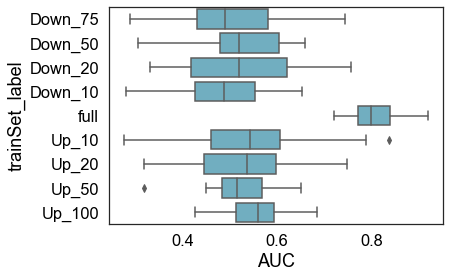

In [27]:
sb.boxplot(data=performance_df, 
	x="AUC", 
	y="trainSet_label",
	color='c',
	order=['Down_75',
	 'Down_50', 
	 'Down_20', 
	 'Down_10',
	 'full', 
	 'Up_10', 
	 'Up_20', 
	 'Up_50', 
	 'Up_100'])

Text(0.5, 1.0, 'Full test set (N=57) ROC AUC across 30 replicates')

(0.45, 0.95)

Text(0, 0.5, '')

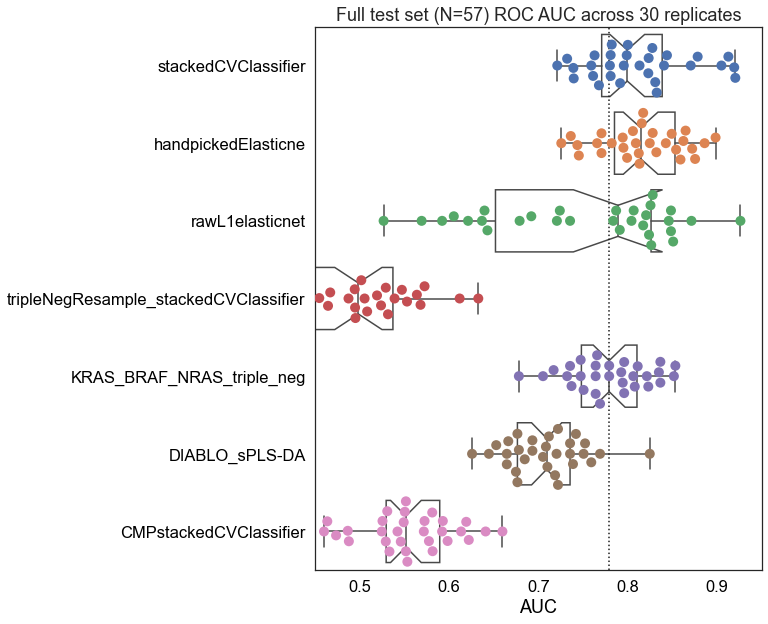

In [6]:

fig, ax = plt.subplots(figsize=(8,10))
fig.subplots_adjust(hspace=0.5)
plot_data = pd.concat([df1, 
		df3[df3.model_name == 'CMPstackedCVClassifier']])
ax = sb.boxplot(x="AUC", y="model_name", 
	notch=True, 
	data=plot_data, 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax)
ax = sb.swarmplot(x="AUC", y="model_name", 
	data=pd.concat([df1, df3[df3.model_name == 'CMPstackedCVClassifier']]),
	s=10, ax=ax)
ax.set_title(f'Full test set (N=57) ROC AUC across 30 replicates')
ax.set_xlim(.45,.95)
median_tripleNeg = plot_data[
	plot_data.model_name == 'KRAS_BRAF_NRAS_triple_neg'].AUC.median() 
ax.axvline(median_tripleNeg, ls=':', c='k')
ax.set_ylabel('')


# Conclusions and Next Steps
Summarize findings here